(app:oscillation-period)=
# The Period of Classical Oscillation

As we discussed in {numref}`app:turning-points`, a classical particle confined in a potential $U(x)$ (See {numref}`fig:turning-points`.) oscillates between turning points $x_1$ and $x_2$.  The period of oscillation is given by the integral 

$$
T=2 \int_{x_1}^{x_2} \frac{1}{v(x)}\, dx
$$(eq:oscillation-period2)

where $v(x)$ is the speed of the particle at $x$ given by 

$$
v(x) = \sqrt{\frac{2(E-U(x))}{m}}
$$(eq:bound-state-speed2)

where $E$ and $m$ are the energy and the mass of the particle. 

We already computed the turning points in {numref}`app:turning-points`.  In this section, we calculate the integral {eq}`eq:oscillation-period2`. At the turning points, the speed vanishes ($v(x_1)=v(x_2)=0$ and thus the integrand has integrable singularities.  The trick discussed in {numref}`sec:integrable-singularities` should work.

FIrst, we need to find the form of singularities and remove them. WE find the behavior of the integrand near the turning point by expanding the potential as

$$
U(x) = U(x_i) + U'(x_i) (x-x_i) + \mathcal{O}(x^2)=E + U'(x_i) (x-x_i) + \mathcal{O}(x^2), \qquad i=1,2
$$

Ignoring the second order and higher, the potential is approximated by $U_i(x) = E+U'(x_i)(x-x_i)$.  Hence, the speed near the turning point is given by 

$$
v_i(x) = \sqrt{\frac{-2U'(x_i)(x-x_i)}{m}}
$$

Note that this approximated speed approaches to the correct speed as $x \rightarrow x_i$.  

Next, we remove the singularities as follows.  We split the integral interval into two parts as $\int_{x_1}^{x_2} dx = \int_{x_1}^{x_c} dx +  \int_{x_c}^{x_2} dx$.   Technically, $x_c$ can be anywhere between $x_1$ and $x_2$ but a good choice is the crossing point of $U_1(x)$ and $U_2(x)$, that is 

$$
x_c = \frac{U'(x_1) x_1 - U'(x_2) x_2}{U'(x_1)-U'(x_2)}
$$

Then, remove the singular components from each part of the divided integrals:

$$
\int_{x_1}^{x_c} \left(\frac{1}{v(x)}-\frac{1}{v_1(x)} \right)dx 
+ \int_{x_c}^{x_2} \left(\frac{1}{v(x)}-\frac{1}{v_2(x)}\right) dx
$$

The singular components are analytically integrated as 

$$
\begin{eqnarray}
\int_{x_1}^{x_c} \frac{1}{v_1(x)} dx &&= \sqrt{\frac{m}{-2 U'(x_1)}} \int_{x_1}^{x_c} \frac{1}{\sqrt{x-x_1}} dx
=\sqrt{\frac{2 m (x_c-x_1)}{|U'(x_1)|}} \\
\int_{x_c}^{x_2} \frac{1}{v_2(x)} dx &&= \sqrt{\frac{m}{2 U'(x_2)}} \int_{x_c}^{x_2} \frac{1}{\sqrt{x_2-x}} dx\, .
=\sqrt{\frac{2 m (x_2-x_c)}{|U'(x_2)|}}
\end{eqnarray}
$$

which will be added to the numerical integration of the non-singular parts.

**Example** {numref}`%s.1 <app:oscillation-period>`  Consider a particle of mass $m$ is bound in a Morse potential

$$
U_M(r) = D_e\left[e^{- 2 a r} - 2 e^{-a r}\right]
$$

The turning points are $x_1 = - \ln (1+\sqrt{E+D_e})$ and $x_2 = -\ln (1-\sqrt{E+D_e})$. As discussed in {numref}`app:turning-points`, we normalized distance and energy by setting $a=1$ and $D_e=1$. The derivative of the potential is

$$
U^\prime_M(r) = -2 e^{-r} (e^{-r}-1).
$$

The period of the Morse oscillator is actually known.  It is $T = \displaystyle\frac{\sqrt{2}\pi}{\sqrt{1-E}}$ in the normalized unit where $E$ is the energy measured from the bottom of the potential{cite}`DeMarcus1978,Astapenko2022`.  We will test the above method by comparing the output with the analytic solution.

First we plot the original potential potential and the approximate one.

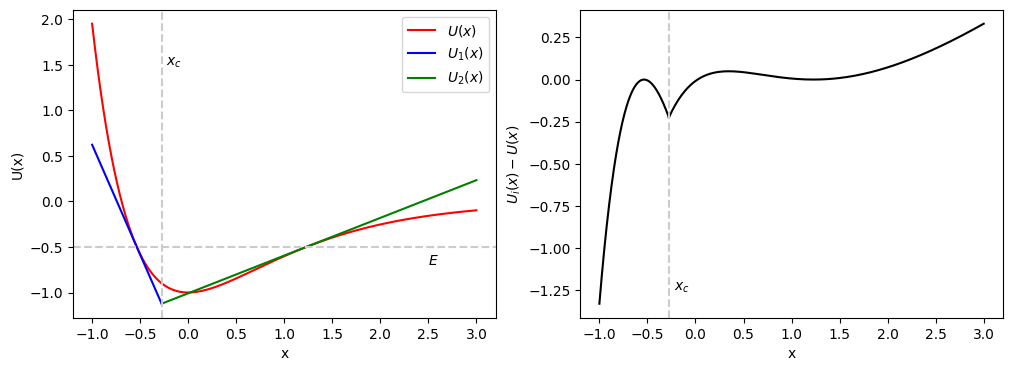

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def u(x):
    return np.exp(-2*x) - 2*np.exp(-x)

def du(x):
    return -2*np.exp(-2*x) + 2*np.exp(-x)

def w(x,y,E):
    return E-1 + du(y)*(x-y)

# energy measured from the bottom of the potential 0 < E < 1.0
E = 0.5

# mass of the particle
m = 1

# turning points
x1 = - np.log(1+np.sqrt(E))
x2 = - np.log(1-np.sqrt(E))

# midpoint
xc = (du(x1)*x1-du(x2)*x2)/(du(x1)-du(x2))

z1 = np.linspace(-1,xc,201)
z2 = np.linspace(xc,3,201)
p0 = u(z1)
p1 = w(z1,x1,E)
dp = p1-p0
q0 = u(z2)
q1 = w(z2,x2,E)
dq = q1-q0

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(z1,p0,'-r',label=r"$U(x)$")
plt.plot(z2,q0,'-r')
plt.plot(z1,p1,'-b',label=r"$U_1(x)$")
plt.plot(z2,q1,'-g',label=r"$U_2(x)$")
plt.axhline(y = E-1, color = '0.8', linestyle = '--')
plt.axvline(x = xc, color = '0.8', linestyle = '--')
plt.xlabel("x")
plt.ylabel("U(x)")
plt.legend(loc=1)
plt.text(xc+0.05,1.5,r"$x_c$")
plt.text(2.5,E-1.2,r"$E$")
    
plt.subplot(1,2,2)
plt.plot(z1,dp,'-k')
plt.plot(z2,dq,'-k')
plt.axvline(x = xc, color = '0.8', linestyle = '--')
plt.xlabel("x")
plt.ylabel(r"$U_i(x)-U(x)$")
plt.text(xc+0.05,-1.25,r"$x_c$")

plt.show()

In the left panel, the red line shows the original potential $U(x)$. The dashed line indicates the energy of the particle. The blue and green lines are the approximated potentials $U_1(x)$ and $U_2(x)$ that has the same slope as the original potential at the turning points. Since the approximated potential is piecewise linear and thus the integration can be done analytically.  We need to use a numerical method for the difference between the red and blue line.  The right panel shows the integrand after the removal of singularities.

In [2]:
from scipy.integrate import trapezoid

# define the speed
def vu(x):
    return np.sqrt(2*(E-1-u(x))/m)

# define the approximate speed
def vw(x,xi):
    return np.sqrt(-2*du(xi)*(x-xi)/m)

# number of evaluation points in each integral
N=500

# evaluation point for the 1st integral
z1=np.linspace(x1,xc,N)
# avoid divided by zero error
z1[0]=x1+0.01
# 1st integrand
f1=1/vu(z1)-1/vw(z1,x1)
# the integrand at the turning point
f1[0]=0
# set the turning point back
z1[0]=x1

# evaluation point for the 2nd integral
z2=np.linspace(xc,x2,N)
# avoid divided by zero error
z2[N-1]=x2-0.01
# 2nd integrand
f2=1/vu(z2)-1/vw(z2,x2)
# the integrand at the turning point
f2[N-1]=0
# set the turning point back
z2[N-1]=x2

# numerical integration by the trapezoidal rule
s1=trapezoid(f1,x=z1)
s2=trapezoid(f2,x=z2)

# singular parts
t1=np.sqrt(2*m*(xc-x1)/abs(du(x1)))
t2=np.sqrt(2*m*(x2-xc)/abs(du(x2)))

# numerical period
numerical = 2*(s1+s2+t1+t2)

# theoretical period
theoretical = np.sqrt(2)*np.pi/np.sqrt(1-E)

print("  Numerical period = {0:8.5f}".format(numerical))
print("Theoretical period = {0:8.5f}".format(theoretical))
print("    Absolute Error = {0:8.5f}".format(abs(numerical-theoretical)))

  Numerical period =  6.28320
Theoretical period =  6.28319
    Absolute Error =  0.00001


The agreement is quite good.

Let's compare the result with the harmonic approximation.  Assuming the amplitude is small, we approximate the potential up to the second order:

$$
U(x) = U(0) + U'(0) x + \frac{1}{2} U''(x) x^2 + \mathcal{O}(x3) \approx -1 + x^2
$$

Recalling that the harmonic potential is given by $\frac{m \omega^2}{2} x^2$, the frequency is $\omega = \sqrt{2}$ and the period is $T=2\pi/\omega = \sqrt{2}\pi \approx 4.44$.   Unlike the harmonic oscillator, the period depends on the energy due to the presence of the higher order terms in the Taylor expansion.

> **Exercise {numref}`%s.1 <app:oscillation-period>`**     Confirm the validity of harmonic approximation by using a small value of $E$.

> **Exercise {numref}`%s.2 <app:oscillation-period>`**  Calculate the period of the oscillation for the (exp-6) hybrid potential (See {numref}`app:turning-points`.)  No analytic solution is knwon for this potential.


___

Updated on 4/16/2024 by R. Kawai